In [1]:
from experiment_utils import *
from model import ViT
from configs import cifar10_config
from torchvision.datasets import CIFAR10
from torchvision import transforms

In [2]:
config = cifar10_config()
model = load_model(ViT, 'pretrained/cifar10.pth', config)

In [3]:
dataset = CIFAR10(root='../datasets', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

data = dataset.data
label = dataset.targets

Files already downloaded and verified


In [4]:
model_summary(model, 3, 32)

                                                   Kernel Shape  \
Layer                                                             
0_to_patch                                                    -   
1_linear_projection                                    [48, 64]   
2_transformer_encoder.blocks.0.LayerNorm_layer_...         [64]   
3_transformer_encoder.blocks.0.msa.Linear_fc_q         [64, 64]   
4_transformer_encoder.blocks.0.msa.Linear_fc_k         [64, 64]   
5_transformer_encoder.blocks.0.msa.Linear_fc_v         [64, 64]   
6_transformer_encoder.blocks.0.msa.Dropout_dropout            -   
7_transformer_encoder.blocks.0.msa.Linear_fc_o         [64, 64]   
8_transformer_encoder.blocks.0.Dropout_dropout                -   
9_transformer_encoder.blocks.0.LayerNorm_layer_...         [64]   
10_transformer_encoder.blocks.0.mlp.Linear_fc1       [64, 1024]   
11_transformer_encoder.blocks.0.mlp.GELU_activa...            -   
12_transformer_encoder.blocks.0.mlp.Dropout_dro...            

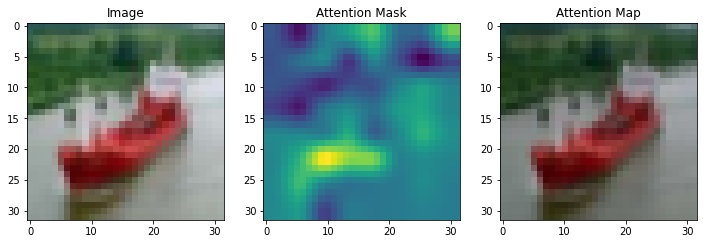

In [5]:
import random

plot_attention_map(data[random.randint(0, 10000)], model, 28, 'cuda')

In [6]:
data[0].shape

(32, 32, 3)

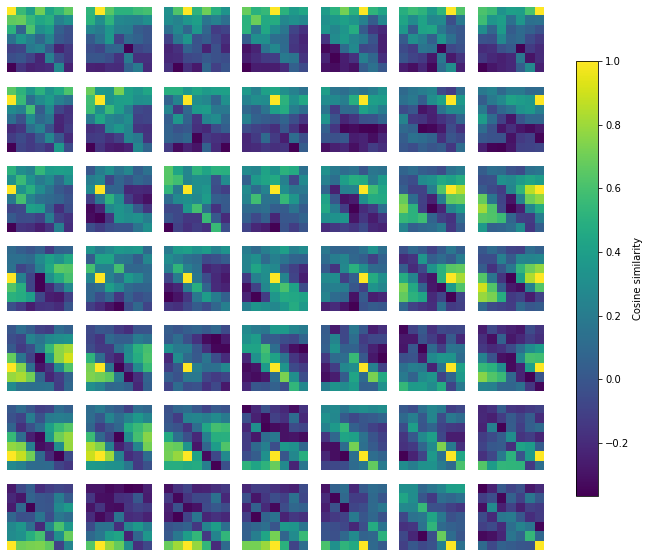

In [7]:
pos_embeddings = model.pos_embedding.squeeze()[1:, :]
plot_pos_emb_similarity(pos_embeddings)

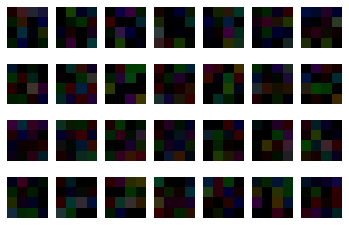

In [8]:
import logging
logger = logging.getLogger()
logger.setLevel(100)

embed_filters = model.linear_projection.weight
plot_rgb_filters(embed_filters, 3, 4, 4)